In [ ]:
def gradient_descent(f, fp, x0, learning_rate, max_Iter):
  paths = [] # 비어 있는 list
  print("{0:02d} : {1:5.5f}, {2:6.5f}".format(0, x0, f(x0)))

  for i in range(max_Iter):
    x1 = x0 - learning_rate * fp(x0)

    # x를 학습률로 지정한 거리만큼 이동
    print('{0:02d} : {1:5.5f}, {2:6.5f}'.format(i+1, x1, f(x1)))

    # x0에 x1의 값을 대입해주며 갱신해주고, 다시 반복
    x0 = x1
    paths.append(x0) # 최적값을 찾아가는 각 점을 모은 것
    return(x0, f(x0), np.array(paths))

00 : 4.00000, 6.00000
01 : 3.10000, 3.41205


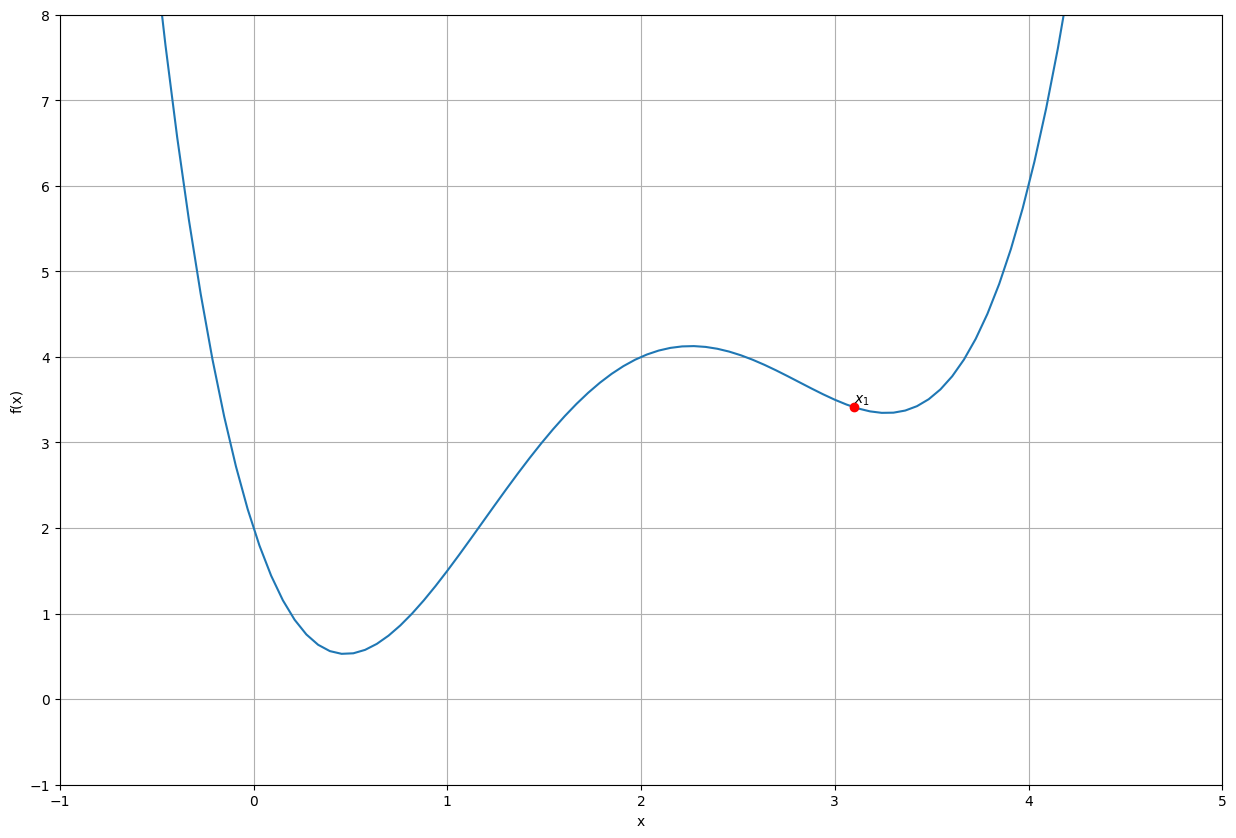

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 0.5*x**4 - 4*x**3 + 10*x**2 - 7*x + 2

def fp(x):
  return 2*x**3 - 12*x**2 + 20*x - 7

xopt, fopt, paths = gradient_descent(f, fp, 4, 0.1, 200)

x = np.linspace(-1, 5, 100)
y = f(x)
plt.figure(figsize=(15, 10))
plt.plot(x, f(x))
plt.plot(paths, f(paths), 'ro:')

for k, point in enumerate(paths):
  plt.text(point, f(point), '$x_{0}$'.format(k+1), verticalalignment='bottom')

plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-1, 5)
plt.ylim(-1.0, 8.0)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
# [x1, x2] -> [1, x1, x2, x1**2, x1x2, x2**2]
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 3 차 다항식 변환
X = np.arange(4).reshape(2,2)

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)
y = polynomial_func(X)

# [x1, x2] -> [1, x1, x2, x1**2, x1x2, x2**2, x1**3, x1**2x2, x1x2**2, x2**3]
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716220e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


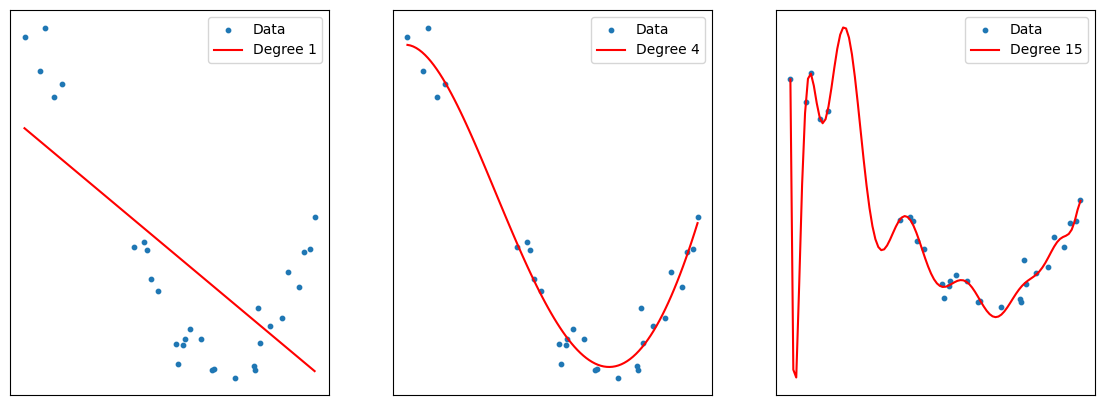

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]
# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
  coefficients = pipeline.named_steps['linear_regression'].coef_

  # 데이터 포인트 표시
  ax.scatter(X, y, s=10, label='Data')

  # 피팅된 regression line 그리기
  X_fit = np.linspace(min(X), max(X), 100)
  y_fit = pipeline.predict(X_fit.reshape(-1, 1))
  ax.plot(X_fit, y_fit, label=f'Degree {degrees[i]}', color='r')

  ax.legend()

  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
  print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

In [ ]:
# 구글 드라이브 마운트

import os
from google.colab import drive

drive.mount('/content/drive')
gdrive_dir = 'LG_Summer_School'

if not os.path.exists('/content/drive/My Drive/' + gdrive_dir):
  os.makedirs('/content/drive/My Drive/' + gdrive_dir)

os.chdir('/content/drive/My Drive/' + gdrive_dir)

data_path = '/content/drive/My Drive/' + gdrive_dir

print(data_path)

Mounted at /content/drive
/content/drive/My Drive/LG_Summer_School


In [ ]:
if not os.path.exists(data_path + '/HousingData.csv'):
  !pip install pydrive
  print('\n\n')
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  gdrive = GoogleDrive(gauth)

  # Download the data with Google Drive link
  csv_file = gdrive.CreateFile({'id':'1leMoA9Q9qyCzkSePN0WKCJ4etaMZvS8K'})
  csv_file.GetContentFile(data_path + '/HousingData.csv')


if not os.path.exists(data_path + '/housing.csv'):

  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  gdrive = GoogleDrive(gauth)

  # Download the data with Google Drive link
  csv_file = gdrive.CreateFile({'id':'1ER6bnEBG9SgMuWYkkZV_JU5iD2Srvh1u'})
  csv_file.GetContentFile(data_path + '/housing.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

# boston 데이타셋 로드
# boston 데이타셋 DataFrame 변환
bostonDF = pd.read_csv(data_path + '/HousingData.csv')
bostonDF = bostonDF.rename(columns={'MEDV':'PRICE'})

print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


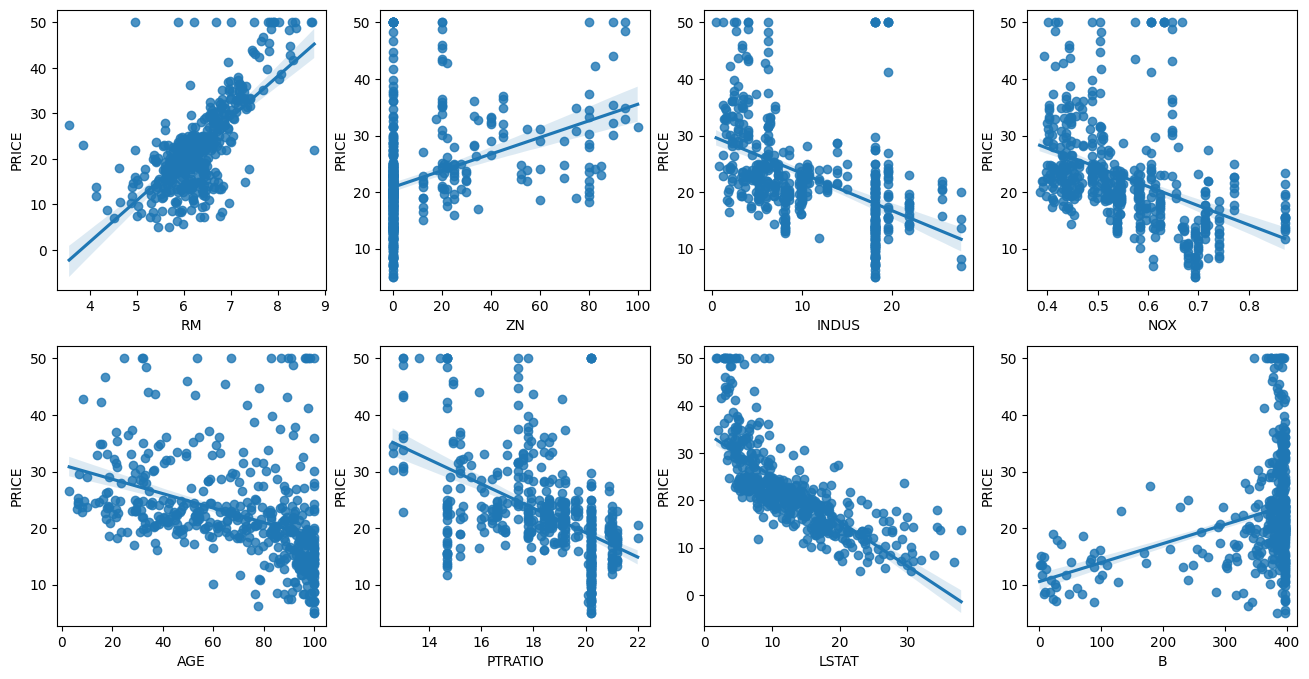

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','B']
for i , feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature , y='PRICE', data=bostonDF , ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

bostonDF = bostonDF.dropna(axis=0)
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 18.558 , RMSE : 4.308
Variance score : 0.800


In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

절편 값: 37.29054276394538
회귀 계수값: [ -0.1   0.1  -0.    2.4 -19.5   3.9  -0.   -1.6   0.3  -0.   -0.9   0.
  -0.4]


RM          3.9
CHAS        2.4
RAD         0.3
ZN          0.1
INDUS      -0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.4
PTRATIO    -0.9
DIS        -1.6
NOX       -19.5
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()


# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-10.64 -19.6  -32.05 -65.53 -27.51]
 5 folds 의 개별 RMSE scores :  [3.26 4.43 5.66 8.09 5.24]
 5 folds 의 평균 RMSE : 5.338 


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-10.049 -23.389 -29.001 -59.14  -23.367]
 5 folds 의 개별 RMSE scores :  [3.17  4.836 5.385 7.69  4.834]
 5 folds 의 평균 RMSE : 5.183 


In [ ]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
  ridge = Ridge(alpha = alpha)

  #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target,
  scoring="neg_mean_squared_error", cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.338 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.307 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.233 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.183 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.173 


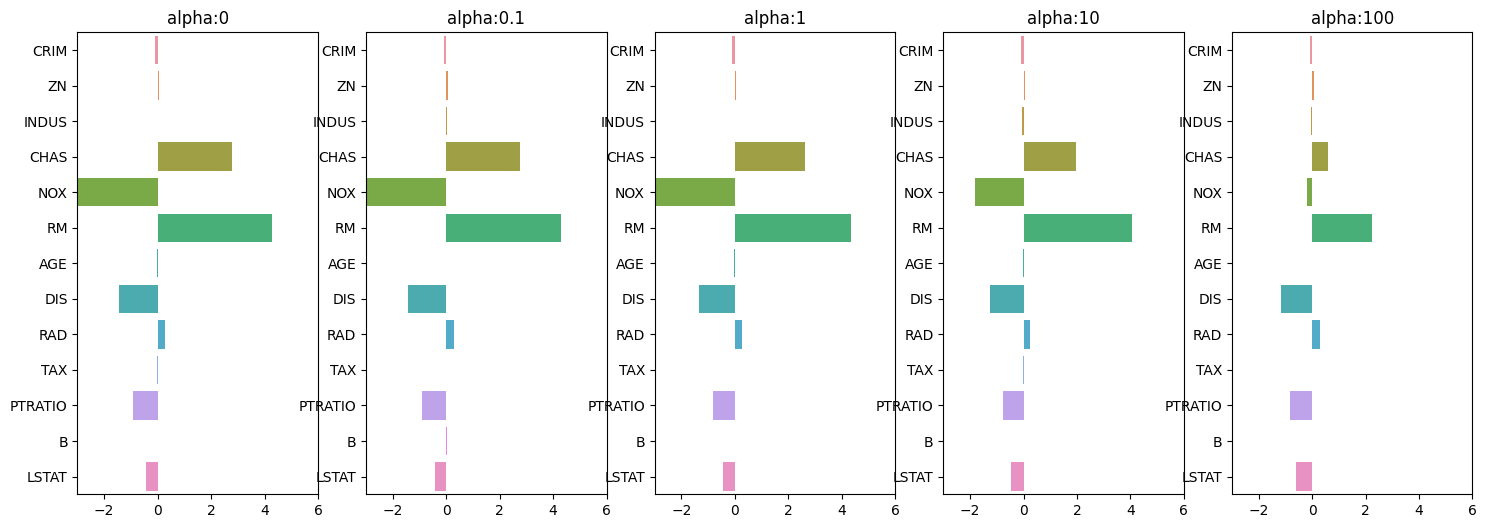

In [ ]:
import seaborn as sns

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

# figsize(가로길이,세로길이) 단위는 inch
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data , y_target)

  # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
  coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
  colname='alpha:'+str(alpha)
  coeff_df[colname] = coeff

  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현 coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [ ]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,4.283252,4.296279,4.339653,4.066645,2.255177
CHAS,2.769378,2.753958,2.638507,1.951062,0.588238
RAD,0.285866,0.281025,0.258834,0.246555,0.287099
ZN,0.048905,0.049195,0.050679,0.054034,0.062215
INDUS,0.030379,0.023995,-0.006298,-0.039907,-0.054857
B,0.009656,0.009744,0.010159,0.010476,0.009301
AGE,-0.012991,-0.014312,-0.020414,-0.024159,-0.007329
TAX,-0.013146,-0.013194,-0.013454,-0.014240,-0.016061
CRIM,-0.097594,-0.096833,-0.093324,-0.090836,-0.091764
LSTAT,-0.423661,-0.424690,-0.430941,-0.461037,-0.590961


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):

  coeff_df = pd.DataFrame()

  if verbose :
    print('####### ', model_name , '#######')
    for param in params:
      if model_name =='Ridge':
        model = Ridge(alpha=param)

      elif model_name =='Lasso':
        model = Lasso(alpha=param)

      elif model_name =='ElasticNet':
        model = ElasticNet(alpha=param, l1_ratio=0.7)

      neg_mse_scores = cross_val_score(model, X_data_n,y_target_n, scoring="neg_mean_squared_error", cv = 5)
      avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

      print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))

      # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
      if return_coeff:
        model.fit(X_data_n, y_target_n)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
        coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff

  return coeff_df

In [ ]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Ridge', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Ridge #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.315 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.307 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.254 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.233 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.210 


In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출 # l1_ratio는 0.7로 고정

elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.229 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.232 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.285 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.461 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.018 


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력

sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,4.010592,3.824040,2.102755,1.033438,0.000000
CHAS,1.472761,1.116063,0.000000,0.000000,0.000000
RAD,0.243269,0.248707,0.269714,0.259185,0.130109
ZN,0.054504,0.055361,0.061303,0.062464,0.053755
B,0.010617,0.010541,0.009229,0.008184,0.006763
TAX,-0.014543,-0.014831,-0.016131,-0.016310,-0.012144
AGE,-0.024012,-0.021946,-0.001263,0.010313,0.036033
INDUS,-0.041240,-0.039755,-0.027804,-0.006045,-0.000000
NOX,-0.071869,-0.000000,-0.000000,-0.000000,-0.000000
CRIM,-0.089180,-0.089200,-0.080926,-0.067199,-0.018569


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정 # p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)

  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)

  elif method == 'Log':
    scaled_data = np.log1p(input_data)

  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree,
    include_bias=False).fit_transform(scaled_data)

  return scaled_data

In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성 # 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환

scale_methods=[(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
  print(X_data_scaled.shape, X_data.shape)
  print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0],
  scale_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
  y_target_n=y_target, verbose=False, return_coeff=False)

(394, 13) (394, 13)

## 변환 유형:None, Polynomial Degree:None
(394, 13) (394, 13)

## 변환 유형:Standard, Polynomial Degree:None
(394, 104) (394, 13)

## 변환 유형:Standard, Polynomial Degree:2
(394, 13) (394, 13)

## 변환 유형:MinMax, Polynomial Degree:None
(394, 104) (394, 13)

## 변환 유형:MinMax, Polynomial Degree:2
(394, 13) (394, 13)

## 변환 유형:Log, Polynomial Degree:None
